## Семинар 1 Индекс

## Intro

### работа с файлами и папками

In [1]:
import os

curr_dir = os.getcwd()
filepath = os.path.join(curr_dir, 'test.txt')

### os.path  
путь до файла

In [2]:
# возвращает полный путь до папки/файла по имени файла / папки
print(os.path.abspath(filepath))


# возвращает имя файла / папки по полному ти до него
print(os.path.basename(filepath))


# проверить существование директории - True / False
print(os.path.exists(curr_dir))

C:\Users\Eduard\Desktop\Projects\infosearch\test.txt
test.txt
True


### os.listdir  
возвращает список файлов в данной директории

In [4]:
os.listdir(curr_dir)

['.ipynb_checkpoints',
 'friends',
 'inverted_collection_without_stopwords.json',
 'inverted_collection_with_stopwords.json',
 'sem1_Index.ipynb',
 'test.txt']

При обходе файлов не забывайте исключать системные директории, такие как .DS_Store

### os.walk
root - начальная директория  
dirs - список поддиректорий (папок)   
files - список файлов в этих поддиректориях  

In [5]:
for root, dirs, files in os.walk(curr_dir):
    for name in files:
        print(os.path.join(root, name))

C:\Users\Eduard\Desktop\Projects\infosearch\inverted_collection_without_stopwords.json
C:\Users\Eduard\Desktop\Projects\infosearch\inverted_collection_with_stopwords.json
C:\Users\Eduard\Desktop\Projects\infosearch\sem1_Index.ipynb
C:\Users\Eduard\Desktop\Projects\infosearch\test.txt
C:\Users\Eduard\Desktop\Projects\infosearch\.ipynb_checkpoints\sem1_Index-checkpoint.ipynb
C:\Users\Eduard\Desktop\Projects\infosearch\.ipynb_checkpoints\sem_texts_Grigorev-checkpoint.ipynb
C:\Users\Eduard\Desktop\Projects\infosearch\friends\Friends - season 1\Friends - 1x01 - The One Where Monica Gets A Roommate.ru.txt
C:\Users\Eduard\Desktop\Projects\infosearch\friends\Friends - season 1\Friends - 1x02 - The One With The Sonogram At The End.ru.txt
C:\Users\Eduard\Desktop\Projects\infosearch\friends\Friends - season 1\Friends - 1x03 - The One With The Thumb.ru.txt
C:\Users\Eduard\Desktop\Projects\infosearch\friends\Friends - season 1\Friends - 1x04 - The One With George Stephanopoulos.ru.txt
C:\Users\Edua

> __os.walk__ возвращает генератор, это значит, что получить его элементы можно только проитерировавшись по нему  
но его легко можно превратить в list и увидеть все его значения

In [6]:
list(os.walk(curr_dir))

[('C:\\Users\\Eduard\\Desktop\\Projects\\infosearch',
  ['.ipynb_checkpoints', 'friends'],
  ['inverted_collection_without_stopwords.json',
   'inverted_collection_with_stopwords.json',
   'sem1_Index.ipynb',
   'test.txt']),
 ('C:\\Users\\Eduard\\Desktop\\Projects\\infosearch\\.ipynb_checkpoints',
  [],
  ['sem1_Index-checkpoint.ipynb', 'sem_texts_Grigorev-checkpoint.ipynb']),
 ('C:\\Users\\Eduard\\Desktop\\Projects\\infosearch\\friends',
  ['Friends - season 1',
   'Friends - season 2',
   'Friends - season 3',
   'Friends - season 4',
   'Friends - season 5',
   'Friends - season 6',
   'Friends - season 7'],
  []),
 ('C:\\Users\\Eduard\\Desktop\\Projects\\infosearch\\friends\\Friends - season 1',
  [],
  ['Friends - 1x01 - The One Where Monica Gets A Roommate.ru.txt',
   'Friends - 1x02 - The One With The Sonogram At The End.ru.txt',
   'Friends - 1x03 - The One With The Thumb.ru.txt',
   'Friends - 1x04 - The One With George Stephanopoulos.ru.txt',
   'Friends - 1x05 - The One Wit

### чтение файла 

In [7]:
fpath = 'test.txt'


# одним массивом
with open(fpath, 'r') as f:  
    text = f.read() 

    
#по строкам, в конце каждой строки \n  
with open(fpath, 'r') as f:   
    text = f.readlines() 

    
#по строкам, без \n   
with open(fpath, 'r') as f:   
    text = f.read().splitlines() 

Напоминание про enumerate:    
> При итерации по списку вы можете помимо самого элемента получить его порядковый номер    
``` for i, element in enumerate(your_list): ...  ```    
Иногда для получения элемента делают так -  ``` your_list[i] ```, не надо так

##  Индекс 

Сам по себе индекс - это просто формат хранения данных, он не может осуществлять поиск. Для этого необходимо добавить к нему определенную метрику. Это может быть что-то простое типа булева поиска, а может быть что-то более специфическое или кастомное под задачу.

Давайте посмотрим, что полезного можно вытащить из самого индекса.    
По сути, индекс - это информация о частоте встречаемости слова в каждом документе.   
Из этого можно понять, например:
1. какое слово является самым часто употребимым / редким
2. какие слова встречаются всегда вместе - так можно парсить твиттер, fb, форумы и отлавливать новые устойчивые выражения в речи
3. как эти документы кластеризуются по N тематикам согласно словам, которые в них упоминаются 

## __Задача__: 

**Data:** Коллекция субтитров сезонов Друзьей. Одна серия - один документ.

**To do:** Постройте небольшой модуль поискового движка, который сможет осуществлять поиск по коллекции документов.
На входе запрос и проиндексированная коллекция (в том виде, как посчитаете нужным), на выходе отсортированный по релевантности с запросом список документов коллекции. 

Релизуйте:
    - функцию препроцессинга данных
    - функцию индексирования данных
    - функцию метрики релевантности 
    - собственно, функцию поиска

[download_friends_corpus](https://yadi.sk/d/yVO1QV98CDibpw)

Напоминание про defaultdict: 
> В качестве multiple values словаря рекомендую использовать ``` collections.defaultdict ```                          
> Так можно избежать конструкции ``` dict.setdefault(key, default=None) ```

In [8]:
### _check : в коллекции должно быть около 165 файлов

In [9]:
# import libraries
import os
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from string import punctuation
punctuation += '…—'
!pip install pymorphy2[fast]
from pymorphy2 import MorphAnalyzer
from collections import Counter, defaultdict
import math
import json
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eduard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eduard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# ~ global variables
pymorphy2_analyzer = MorphAnalyzer()
rus_stopwords = stopwords.words('russian')

In [11]:
# функция препроцессинга данных
def preprocess_text(text, save_stopwords=True):
    lowered_tokens = [word.strip(punctuation) for word in word_tokenize(text.lower()) if word.strip(punctuation)]
    if save_stopwords:
        return [pymorphy2_analyzer.normal_forms(token)[0] for token in lowered_tokens]
    return [pymorphy2_analyzer.normal_forms(token)[0] for token in lowered_tokens if pymorphy2_analyzer.normal_forms(token)[0] not in rus_stopwords]

In [12]:
# функция индексирования данных
def inverted_index(text, text_id):
    text_length = len(text)
    return {key: (text_id, value, text_length) for key, value in Counter(text).items()}

In [13]:
# функция метрики релевантности
def average_precision_at_k(predicted_answers, true_answers, k=3):
    sum = 0
    count = 0
    for index, predicted_answer in enumerate(predicted_answers[:k]):
        if predicted_answer in true_answers[:k]:
            count += 1
            sum += count / (index + 1)
    return sum / k

In [14]:
# get inverted_collection
def get_inverted_collection(curr_dir, save_stopwords=True):
    inverted_collection = defaultdict(list)
    for root, dirs, files in os.walk(curr_dir):
        for file in files:
            with open(os.path.join(root, file), 'r', encoding='utf-8-sig') as f:
                for token, value in inverted_index(preprocess_text(f.read(), save_stopwords=save_stopwords), file).items():
                    inverted_collection[token].append(value)
    return inverted_collection

In [15]:
curr_dir = os.path.abspath('friends')

In [16]:
with open('inverted_collection_with_stopwords.json', 'w', encoding='utf-8') as f:
    json.dump(get_inverted_collection(curr_dir, save_stopwords=True), f)
with open('inverted_collection_without_stopwords.json', 'w', encoding='utf-8') as f:
    json.dump(get_inverted_collection(curr_dir, save_stopwords=False), f)

In [17]:
# функция поиска
def search(request, inverted_collection, save_stopwords=True):
    vec_size = len(inverted_collection)
    print(vec_size, 'words')
    unique_docs = {triple[0] for triples in inverted_collection.values() for triple in triples}
    num_of_docs = len(unique_docs)
    print(num_of_docs, 'docs')

    index = pd.Index(unique_docs, name='docs')
    columns = pd.Index(inverted_collection.keys(), name='words')
    df = pd.DataFrame(0., index=index, columns=columns)
    for word, triples in inverted_collection.items():
        idf = math.log10(num_of_docs / len(triples))  # I didn't add 1 to the denominator as pairs is definitely not an empty array
        for triple in triples:
            tf = triple[1] / triple[2]
            df.at[triple[0], word] = tf * idf

    request_dct = inverted_index(preprocess_text(request, save_stopwords=save_stopwords), 'request')
    removed_keys = set(request_dct.keys()) - set(inverted_collection.keys())
    for removed_key in removed_keys:
        del request_dct[removed_key]

    request_vec = np.zeros((1, vec_size))
    columns_list = columns.values.tolist()
    for word, triple in request_dct.items():
        tf = triple[1] / triple[2]
        idf = math.log10(num_of_docs / len(inverted_collection[word]))
        request_vec[0][columns_list.index(word)] = tf * idf

    rows_list = index.values.tolist()
    doc_to_cosine = {}
    for row in rows_list:
        doc_to_cosine[row] = 1 - spatial.distance.cosine(df.loc[row], request_vec)

    return [pair[0] for pair in sorted(doc_to_cosine.items(), key=lambda elem: -elem[1])]

In [18]:
with open('inverted_collection_with_stopwords.json', 'r', encoding='utf-8') as f:
    inverted_collection_with_stopwords = json.load(f)

with open('inverted_collection_without_stopwords.json', 'r', encoding='utf-8') as f:
    inverted_collection_without_stopwords = json.load(f)

In [19]:
our_order = search('Разве это не чудесно?', inverted_collection_with_stopwords, save_stopwords=True)

15748 words
165 docs


In [20]:
our_order

["Friends - 7x23 - The One With Chandler And Monica's Wedding (1).ru.txt",
 "Friends - 7x24-25 - The One With Chandler And Monica's Wedding (2).ru.txt",
 'Friends - 6x25-26 - The One With The Proposal (2).ru.txt',
 'Friends - 3x18 - The One With The Hypnosis Tape.ru.txt',
 'Friends - 2x16 - The One Where Joey Moves Out.ru.txt',
 'Friends - 3x13 - The One Where Monica And Richard Are Just Friends.ru.txt',
 'Friends - 1x08 - The One Where Nana Dies Twice.ru.txt',
 'Friends - 2x20 - The One Where Old Yeller Dies.NurlanB.ru.txt',
 'Friends - 6x04 - The One Where Joey Loses His Insurance.ru.txt',
 'Friends - 5x23-24 - The One In Vegas (1).ru.txt',
 "Friends - 6x13 - The One With Rachel's Sister (1).ru.txt",
 'Friends - 2x05 - The One With Five Steaks And An Eggplant.ru.txt',
 'Friends - 2x18 - The One Where Dr. Ramoray Dies.ru.txt',
 'Friends - 2x23 - The One With The Chicken Pox.ru.txt',
 "Friends - 3x11 - The One Where Chandler Can't Remember Which Sister.ru.txt",
 'Friends - 4x21 - The O

Предположим, что следующий порядок является правильным (`топ-10`) для запроса 'Разве это не чудесно?':

In [21]:
correct_order = [
    'Friends - 6x25-26 - The One With The Proposal (2).ru.txt',
    'Friends - 1x08 - The One Where Nana Dies Twice.ru.txt',
    "Friends - 3x11 - The One Where Chandler Can't Remember Which Sister.ru.txt",
    "Friends - 7x24-25 - The One With Chandler And Monica's Wedding (2).ru.txt",
    'Friends - 2x18 - The One Where Dr. Ramoray Dies.ru.txt',
    "Friends - 7x23 - The One With Chandler And Monica's Wedding (1).ru.txt",
    'Friends - 2x16 - The One Where Joey Moves Out.ru.txt',
    'Friends - 2x05 - The One With Five Steaks And An Eggplant.ru.txt',
    "Friends - 6x13 - The One With Rachel's Sister (1).ru.txt",
    'Friends - 3x18 - The One With The Hypnosis Tape.ru.txt'
]

Тогда можно посчитать метрику релевантности нашего алгоритма `average_precision_at_k`:

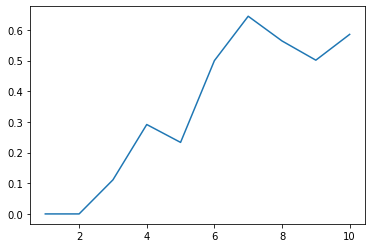

In [22]:
precision = []
for k in range(1, 11):
    precision.append(average_precision_at_k(our_order, correct_order, k=k))
plt.plot(range(1, 11), precision)

In [23]:
search('Тебе плевать на неприкосновенность моего жилища?', inverted_collection_without_stopwords, save_stopwords=False)

15642 words
165 docs


['Friends - 1x13 - The One With The Boobies.ru.txt',
 "Friends - 7x23 - The One With Chandler And Monica's Wedding (1).ru.txt",
 "Friends - 4x13 - The One With Rachel's Crush.ru.txt",
 'Friends - 3x08 - The One With The Giant Poking Device.ru.txt',
 'Friends - 5x01 - The One After Ross Says Rachel.ru.txt',
 "Friends - 7x01 - The One With Monica's Thunder.ru.txt",
 "Friends - 7x22 - The One With Chandler's Dad.ru.txt",
 'Friends - 1x16 - The One With Two Parts (1).ru.txt',
 'Friends - 5x11 - The One With All The Resolutions.ru.txt',
 'Friends - 4x12 - The One With The Embryos.ru.txt',
 "Friends - 3x14 - The One With Phoebe's Ex-Partner.ru.txt",
 'Friends - 2x23 - The One With The Chicken Pox.ru.txt',
 'Friends - 1x07 - The One With The Blackout.ru.txt',
 'Friends - 3x10 - The One Where Rachel Quits.ru.txt',
 'Friends - 6x23 - The One With The Ring.ru.txt',
 "Friends - 3x11 - The One Where Chandler Can't Remember Which Sister.ru.txt",
 'Friends - 7x13 - The One Where Rosita Dies.ru.txt',

С помощью обратного индекса посчитайте:  


a) какое слово является самым частотным

b) какое самым редким

c) какой набор слов есть во всех документах коллекции

d) какой сезон был самым популярным у Чендлера? у Моники?

e) кто из главных героев статистически самый популярный? 


In [24]:
def count_frequency(absolute=False, stopwords=True, minus=True):
    word_to_count = {}
    if stopwords:
        inverted_collection = inverted_collection_with_stopwords
    else:
        inverted_collection = inverted_collection_without_stopwords
    for word, triples in inverted_collection.items():
        if absolute:
            word_to_count[word] = sum([triple[1] for triple in triples])
        else:
            word_to_count[word] = len(triples)
    if minus:
        lst = sorted(word_to_count.items(), key=lambda kv: -kv[1])
    else:
        lst = sorted(word_to_count.items(), key=lambda kv: kv[1])
    results = []
    for pair in lst:
        if pair[1] != lst[0][1]:
            break
        results.append(pair[0])
    return lst[0][1], results

In [25]:
# a (подразумеваю леммы)

print('Со стопсловами:')

# 1)
value, results = count_frequency()
print(f'Самые частотные по встречаемости в документах ({value}):', ', '.join(results))

# 2)
value, results = count_frequency(absolute=True)
print(f'Самые частотные по абсолютной встречаемости ({value}):', ', '.join(results))

print()

print('Без стопслов:')

# 1) 
value, results = count_frequency(stopwords=False)
print(f'Самые частотные по встречаемости в документах ({value}):', ', '.join(results))

# 2)
value, results = count_frequency(absolute=True, stopwords=False)
print(f'Самые частотные по абсолютной встречаемости ({value}):', ', '.join(results))

Со стопсловами:
Самые частотные по встречаемости в документах (165): как, весь, да, он, просто, ты, на, с, не, мочь, быть, так, у, и, в, я, знать, ну, хотеть, она, что, это, такой, мы, а, тот, мой, нет, если, сказать, этот, о, ещё, но, думать
Самые частотные по абсолютной встречаемости (18475): я

Без стопслов:
Самые частотные по встречаемости в документах (165): весь, просто, мочь, знать, хотеть, это, сказать, ещё, думать
Самые частотные по абсолютной встречаемости (7506): это


In [26]:
# б (подразумеваю леммы)

print('Со стопсловами:')

# 1)
value, results = count_frequency(minus=False)
print(f'Самые редкие по встречаемости в документах ({value}):', ', '.join(results))

print()

# 2)
value, results = count_frequency(absolute=True, minus=False)
print(f'Самые редкие по абсолютной встречаемости ({value}):', ', '.join(results))

print()

print('Без стопслов:')

# 1) 
value, results = count_frequency(stopwords=False, minus=False)
print(f'Самые редкие по встречаемости в документах ({value}):', ', '.join(results))

print()

# 2)
value, results = count_frequency(absolute=True, stopwords=False, minus=False)
print(f'Самые редкие по абсолютной встречаемости ({value}):', ', '.join(results))

Со стопсловами:
Самые редкие по встречаемости в документах (1): придурь, горб, придача, старшеклассник, обмотать, чмо, зацикливаться, истерический, всхлип, лимож, сахарок, тут-то, человек-картошка, трубчатый, орган, столкнуть, запутаться, росинка, тычинка, пестик, рваный, гм, полседьмого, вбузздить, вино-половина, вино-полом, у-уй, уписаться, кипяток, ящерица, кишкоизвержение, присобачить, скоба, боковина, гэ, прикрепляться, пила, сваливать, отбеливать, банный, скотина, отрубиться, финклый, 26, даваться, полным-полно, вишнево-ванильный, посыпка, откровение, джоани, каннингем, чача, суперпремьера, бриолин, анжел, приглашать-то, вторгнуться, польша, по-ковбойски, бивис, батхед, сеновал, театрик, возмутить, попугаячий, вино-пола, наукообразный, отравлять, распространять, сапог, энд, полцена, потому-то, портовый, ароматерапия, символический, консилиум, завалиться, верю-ю-ть, уша-а-, задок, распознать, фигура, лайза, увертюра, комик, перетерпеть, пинк, покупаться, пробираться, пластинка, ул

In [27]:
# c)

unique_docs = {triple[0] for triples in inverted_collection_without_stopwords.values() for triple in triples}
num_of_docs = len(unique_docs)
print(f'Всего документов: {num_of_docs}')

value, results = count_frequency()
print(f"Слова {', '.join(results)} встречаются в {value} документах.")

Всего документов: 165
Слова как, весь, да, он, просто, ты, на, с, не, мочь, быть, так, у, и, в, я, знать, ну, хотеть, она, что, это, такой, мы, а, тот, мой, нет, если, сказать, этот, о, ещё, но, думать встречаются в 165 документах.


In [28]:
# d)

def plot_popularity_graph(character, consider_related_words=True):
    related_words = []
    if consider_related_words:
        for word in inverted_collection_with_stopwords:
            if word.startswith(character):
                related_words.append(word)
    else:
        related_words = [character]

    season_to_count = defaultdict(int)
    for word in related_words:
        for triple in inverted_collection_with_stopwords[word]:
            season_to_count[triple[0][10]] += triple[1]

    plt.plot(list(season_to_count.keys()), list(season_to_count.values()))
    return season_to_count

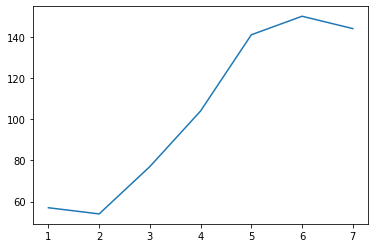

In [29]:
# 6-й сезон для Чендлера
chandler = plot_popularity_graph('чендлер')

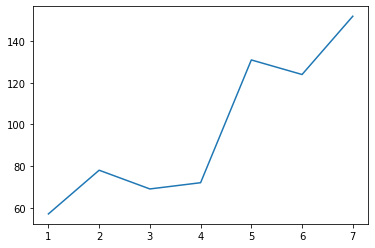

In [30]:
# 7-й сезон для Моники
monica = plot_popularity_graph('моник')

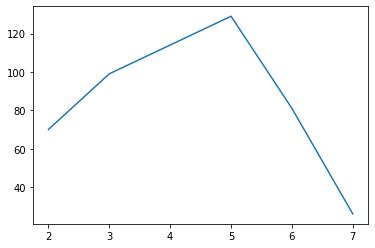

In [31]:
# e)

rachel = plot_popularity_graph('рейч')

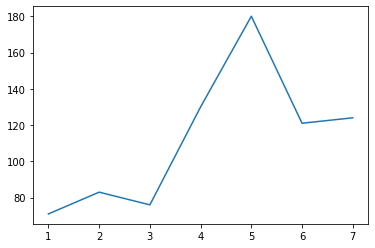

In [32]:
phoebe = plot_popularity_graph('фиб')

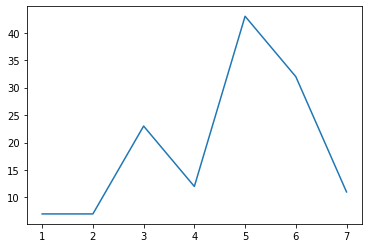

In [33]:
joey = plot_popularity_graph('джо', consider_related_words=False)

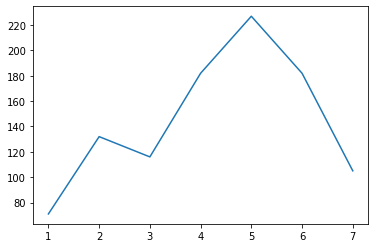

In [34]:
ross = plot_popularity_graph('росс', consider_related_words=False)

In [35]:
chandler_count = sum(chandler.values())
monica_count = sum(monica.values())
rachel_count = sum(rachel.values())
phoebe_count = sum(phoebe.values())
joey_count = sum(joey.values())
ross_count = sum(ross.values())

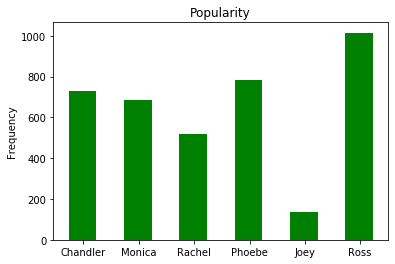

In [36]:
# Ross
fig, ax = plt.subplots()
rects = ax.bar(range(6), [chandler_count, monica_count, rachel_count, phoebe_count, joey_count, ross_count], 0.5, color='g')
ax.set_ylabel('Frequency')
ax.set_title('Popularity')
ax.set_xticks(np.add(range(6), 1/50))
ax.set_xticklabels((['Chandler', 'Monica', 'Rachel', 'Phoebe', 'Joey', 'Ross']))

plt.show()